# Examples and exercises

## Environment

Requirement

* Numpy
* Scipy
* Pandas

### 2.3.1.2 Weibull distribution

Following script is based on [Risk Engineering: Analyzing weather data¶](https://risk-engineering.org/notebook/data-analysis-weather.html)

In [1]:
# import packages
import numpy
import scipy.stats
import pandas
import matplotlib.pyplot as plt
#plt.style.use("bmh")
#plt.xkcd()  uncomment this line to make plots funny, which is not comaptiable with LaTeX


In [2]:
# load data
data = pandas.read_csv(r"../data/TLS-weather-data-2013.csv")
data.head()

,CET,Max TemperatureC,Mean TemperatureC,Min TemperatureC,Dew PointC,MeanDew PointC,Min DewpointC,Max Humidity,Mean Humidity,Min Humidity,...,Max VisibilityKm,Mean VisibilityKm,Min VisibilitykM,Max Wind SpeedKm/h,Mean Wind SpeedKm/h,Max Gust SpeedKm/h,Precipitationmm,CloudCover,Events,WindDirDegrees
0,2013-1-1,12,9,6,8,7,5,93,86,76,...,31,10,5,26,14,NaN,5.08,7.0,Rain,234
1,2013-1-2,9,7,4,6,4,2,93,86,71,...,31,11,10,23,16,NaN,0.00,5.0,NaN,298
2,2013-1-3,8,4,0,4,2,-1,100,87,69,...,19,10,10,13,5,NaN,0.00,5.0,NaN,118
3,2013-1-4,7,6,5,7,6,4,100,94,83,...,10,6,1,10,5,NaN,0.00,8.0,Fog,292
4,2013-1-5,7,6,5,6,6,4,100,94,90,...,11,9,2,16,8,NaN,0.00,8.0,NaN,306


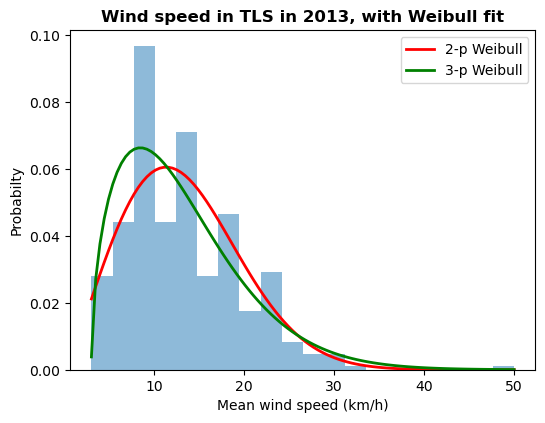

In [3]:
wind = data["Mean Wind SpeedKm/h"]

p0, p1, p2 = scipy.stats.weibull_min.fit(wind, floc=0)
sp0, sp1, sp2 = scipy.stats.weibull_min.fit(wind, floc=wind.min()-0.01)

fig = plt.figure(figsize=(6, 4.5), dpi=100)

ax = fig.add_subplot(1,1,1)
ax.hist(wind, bins = 20,density=True, alpha=0.5)

support = numpy.linspace(wind.min(), wind.max(), 100)

ax.plot(support, scipy.stats.weibull_min.pdf(support, p0, p1, p2), "r-", lw=2, label = '2-p Weibull')
ax.plot(support, scipy.stats.weibull_min.pdf(support, sp0, sp1, sp2), "g-", lw=2, label = '3-p Weibull')

ax.set_title("Wind speed in TLS in 2013, with Weibull fit", weight="bold")
ax.set_xlabel("Mean wind speed (km/h)")
ax.set_ylabel("Probabilty")

ax.legend()

KstestResult(statistic=0.10588868591402806, pvalue=0.0005114617412844044)

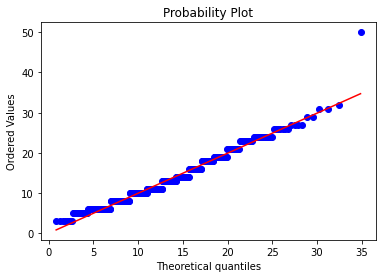

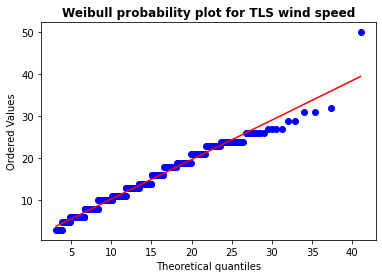

In [4]:

scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(p0, p1, p2), 
                     plot=plt.figure().add_subplot(111))
scipy.stats.probplot(wind, dist=scipy.stats.weibull_min(sp0, sp1, sp2), 
                     plot=plt.figure().add_subplot(111))

             
plt.title("Weibull probability plot for TLS wind speed", weight="bold")
scipy.stats.kstest(wind, "weibull_min", args=(p0, p1, p2))
scipy.stats.kstest(wind, "weibull_min", args=(sp0, sp1, sp2))

### 2.3.2.6 logarithmic wind speed profile


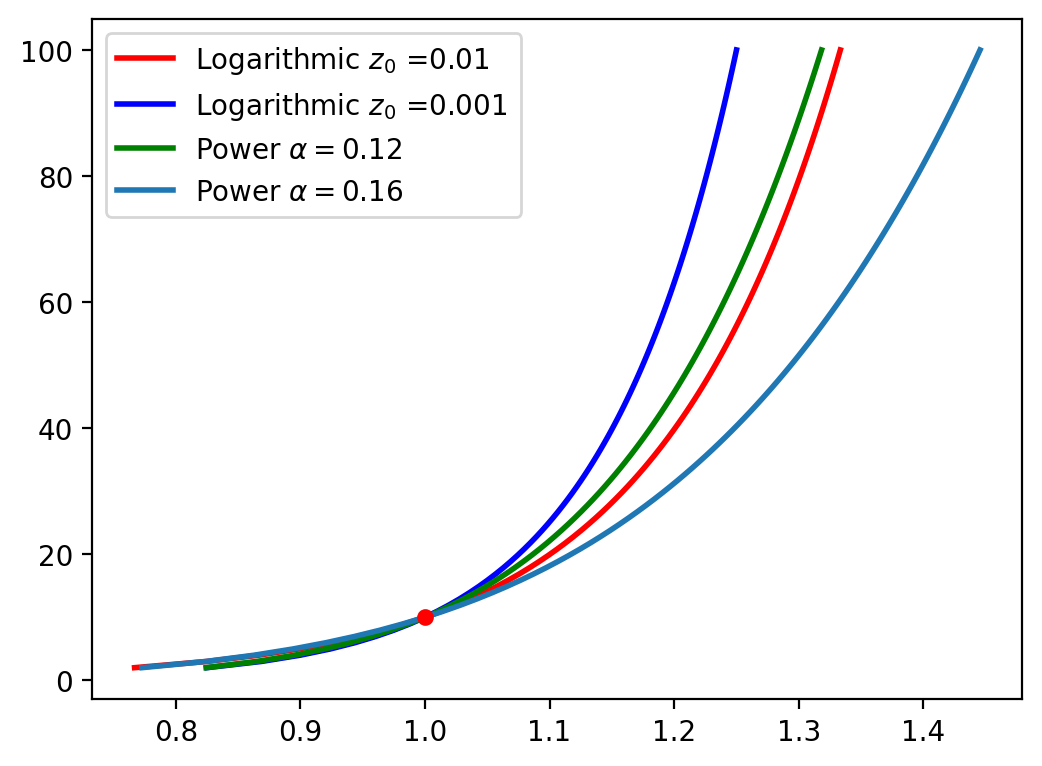

In [5]:
import numpy as np
import matplotlib.pyplot as plt


Z_0 = 0.01 # terrain roughness parameter Z0
Z_1 = 0.001 # terrain roughness parameter Z1
K_a = 0.4 # von Karman's constant

Height = np.linspace(2,100, 100)

H = 10 #Height
alpha1 = 0.12 #Power-law alpha 0.12
alpha2 = 0.16 #Power-law alpha 0.16


Kappa = K_a**2 /((np.log(H/Z_0)))**2 # surface friction coefficient

Uz1 = (1+1/K_a*np.sqrt(Kappa)*np.log(Height / H)) # Uz1 profile 2.3.2.6
Uz2 = (1+np.log(Height/H)/np.log(H/Z_1)) # Uz2 profile

UzPower1 = (Height/H)**alpha1 # Power law1
UzPower2 = (Height/H)**alpha2 # Power law2
fig = plt.figure(figsize=(6, 4.5), dpi=200)

ax = fig.add_subplot(1,1,1)

ax.plot(Uz1, Height, "r-", lw=2,label = r'Logarithmic $z_{0}$ =0.01 ')
ax.plot(Uz2, Height, "b-", lw=2,label = r'Logarithmic $z_{0}$ =0.001 ')
ax.plot(UzPower1, Height, "g-", lw=2,label = r'Power $\alpha = 0.12$')
ax.plot(UzPower2, Height, "-", lw=2,label = r'Power $\alpha = 0.16$')

ax.plot(1, H,'.r',markersize=10)

ax.legend()

In [6]:
def froya_profile(U_0, T_0, H_0,Tx, Hx):
    #  U_0, input wind speed
    #  T_0, is 1 hour
    # H_0 is input height
    # Tx is average period
    # Hx is height output


    C = 5.73 * 10**(-2) * np.sqrt(1 + 0.148* U_0)

    I_U = 0.06 * (1 + 0.043 * U_0)* ((Hx / H_0))**(-0.22)

    Ux= U_0 * (1 + C * np.log(Hx/H_0)) * ( 1 - 0.41 * I_U * np.log(Tx / T_0))

    return Ux


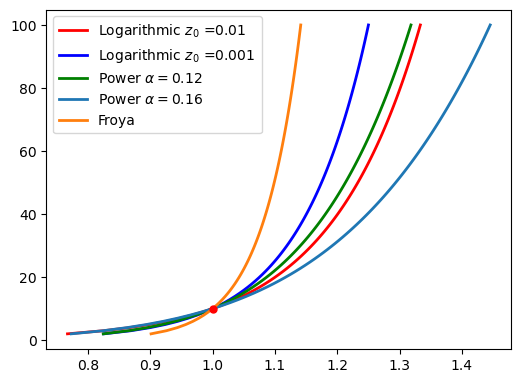

In [7]:
Froya_U = froya_profile(1, 1, 10, 1, Height)

fig = plt.figure(figsize=(6, 4.5), dpi=100)

ax = fig.add_subplot(1,1,1)


ax.plot(Uz1, Height, "r-", lw=2,label = r'Logarithmic $z_{0}$ =0.01 ')
ax.plot(Uz2, Height, "b-", lw=2,label = r'Logarithmic $z_{0}$ =0.001 ')
ax.plot(UzPower1, Height, "g-", lw=2,label = r'Power $\alpha = 0.12$')
ax.plot(UzPower2, Height, "-", lw=2,label = r'Power $\alpha = 0.16$')

ax.plot(Froya_U, Height, "-", lw=2,label = f'Froya')

ax.plot(1, H,'.r',markersize=10)

ax.legend()

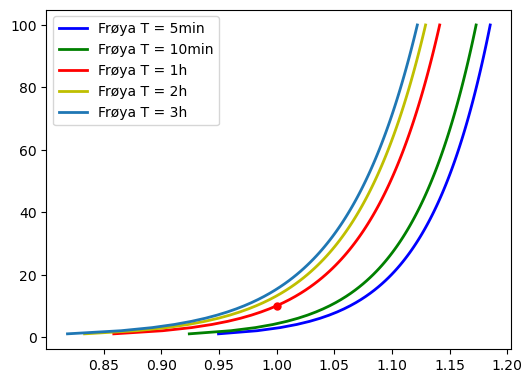

In [8]:
#Frøya wind profile model d

Height = np.linspace(1,100, 100)
U_0 = 1
T_0 = 1
H_0 = 10
U_T5 = froya_profile(U_0, T_0, H_0, 1/12, Height)
U_T10 = froya_profile(U_0, T_0, H_0, 1/6, Height)
U_T60 = froya_profile(U_0, T_0, H_0, 1, Height)
U_T120 = froya_profile(U_0, T_0, H_0, 2, Height)
U_T180 = froya_profile(U_0, T_0, H_0, 3, Height)

fig = plt.figure(figsize=(6, 4.5), dpi=100)

ax = fig.add_subplot(1,1,1)

ax.plot(U_T5, Height, "b-", lw=2,label = f'Frøya T = 5min')
ax.plot(U_T10, Height, "g-", lw=2,label = f'Frøya T = 10min')
ax.plot(U_T60, Height, "r-", lw=2,label = f'Frøya T = 1h')
ax.plot(U_T120, Height, "y-", lw=2,label = f'Frøya T = 2h')
ax.plot(U_T180, Height, "-", lw=2,label = f'Frøya T = 3h')
ax.plot(U_0, H_0,'.r',markersize=10)
ax.legend()

In [9]:
#### 2.3.4

#Wind data spectrum buttworth

import pandas as pd
import datetime


WS_10min = pd.read_pickle(r'../data/WS.pkl')
WS_10min


,WS
2000-01-01 00:00:00,5.582792
2000-01-01 00:10:00,4.907792
2000-01-01 00:20:00,4.728792
2000-01-01 00:30:00,4.832792
2000-01-01 00:40:00,5.193792
...,...
2001-12-11 10:40:00,5.068792
2001-12-11 10:50:00,5.756792
2001-12-11 11:00:00,6.186792
2001-12-11 11:10:00,6.223792


In [10]:
from scipy.signal import welch
import matplotlib
matplotlib.rcParams['text.usetex'] = True
import matplotlib.pyplot as plt

f_10m, Pxx_den_10m = welch(WS_10min['WS'],1, nperseg=1024,detrend='constant',scaling='density')


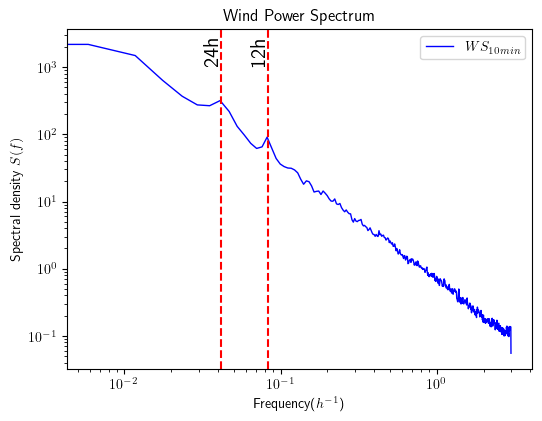

In [11]:

fig = plt.figure(figsize=(6, 4.5), dpi=100)

ax = fig.add_subplot(1,1,1)

line10,  = ax.loglog(f_10m*6, Pxx_den_10m, c='blue', lw  = 1, label = r'$WS_{10min}$')


ax.set_xlabel('Frequency($h^{-1}$)')
ax.set_ylabel('Spectral density $S(f)$')
ax.set_title('Wind Power Spectrum')
ax.axvline(x=1/12, color='red', linestyle='--')
ax.axvline(x=1/24, color='red', linestyle='--')
ax.annotate('24h',xy=(1/24-1/200, 1000), size=15, rotation=90, va='bottom', ha='center')
ax.annotate('12h',xy=(1/12-1/100, 1000), size=15, rotation=90, va='bottom', ha='center')
ax.legend()


Links


[TrentonBush/turbulence_spectra: Processing and analysis of 20Hz wind data from NREL NWTC meteorological mast M5](https://github.com/TrentonBush/turbulence_spectra)


[egorssed/Pulsar_wind_nebula_Spectral_analysis](https://github.com/egorssed/Pulsar_wind_nebula_Spectral_analysis)

